In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression  # Correct import

In [2]:
# Importing dataset
df = pd.read_csv("D:\\SYMBIOSIS\\SEMESTER 5\\Machine Learning Elective\\loan_data_set.csv")

In [3]:
# Initial data exploration
print(df.head())
print(df.describe())
df.info()

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [4]:
# Preprocessing
print(df.isnull().sum())
# Fill missing values for numerical columns - mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())
# Fill missing values for categorical columns - mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
print(df.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


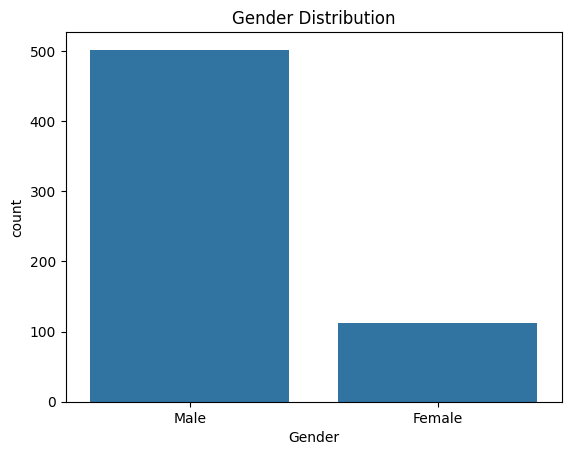

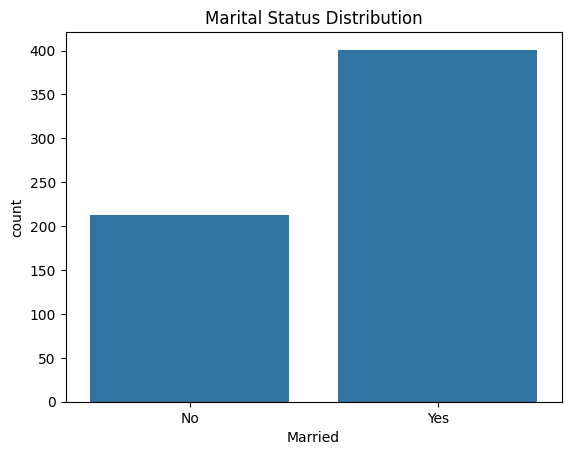

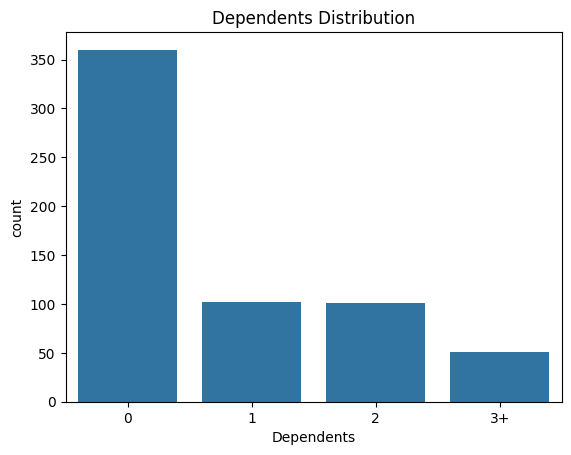

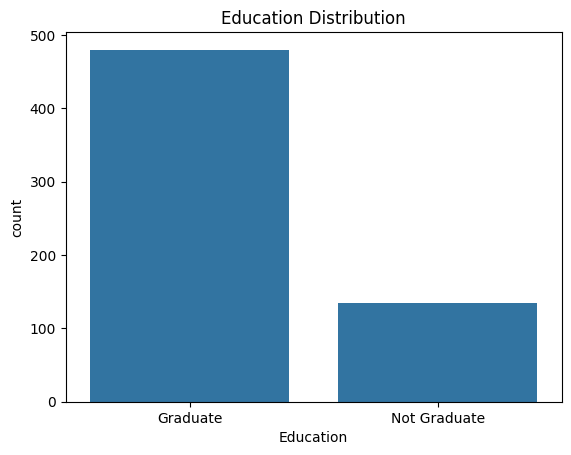

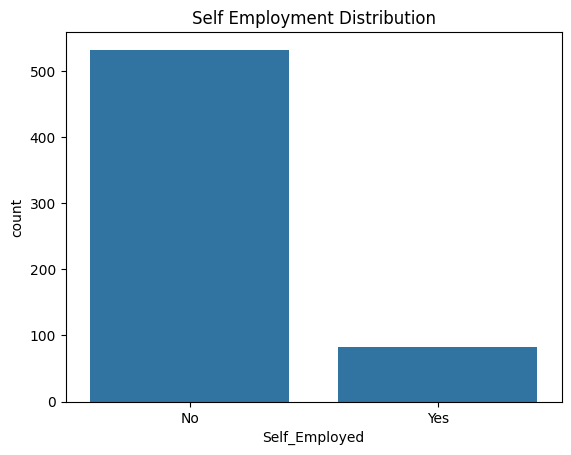

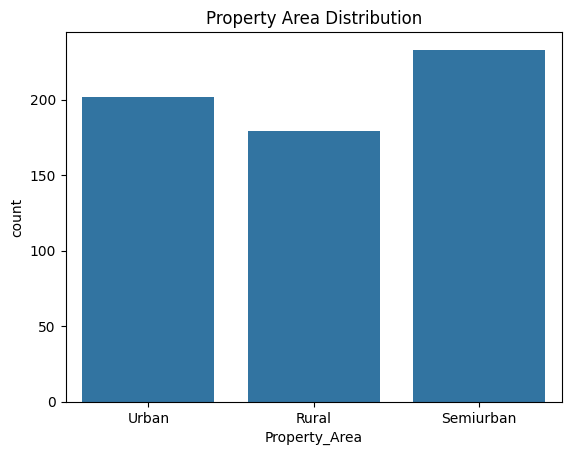

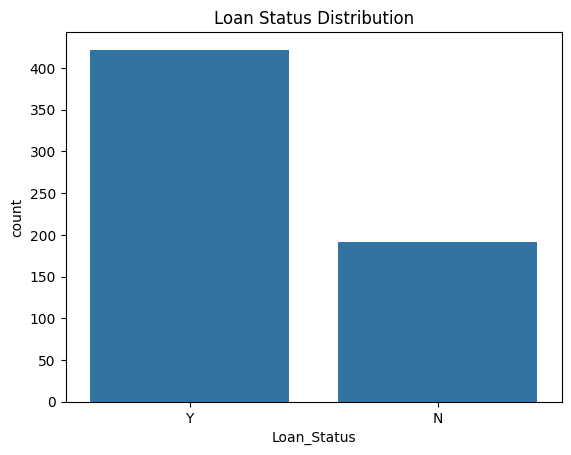

In [5]:
# Exploratory Data Analysis
# Categorical attributes visualization
sns.countplot(x='Gender', data=df).set_title('Gender Distribution')
plt.show()
sns.countplot(x='Married', data=df).set_title('Marital Status Distribution')
plt.show()
sns.countplot(x='Dependents', data=df).set_title('Dependents Distribution')
plt.show()
sns.countplot(x='Education', data=df).set_title('Education Distribution')
plt.show()
sns.countplot(x='Self_Employed', data=df).set_title('Self Employment Distribution')
plt.show()
sns.countplot(x='Property_Area', data=df).set_title('Property Area Distribution')
plt.show()
sns.countplot(x='Loan_Status', data=df).set_title('Loan Status Distribution')
plt.show()

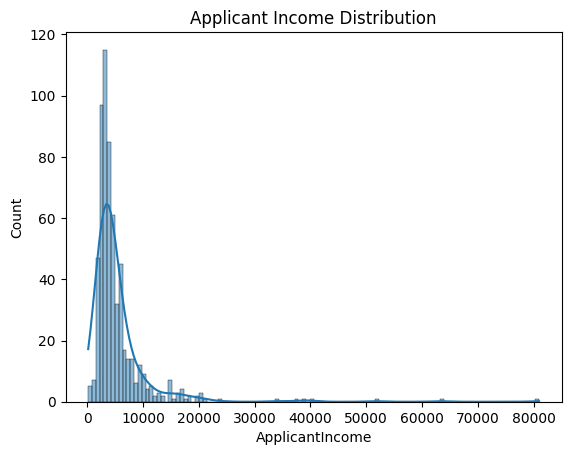

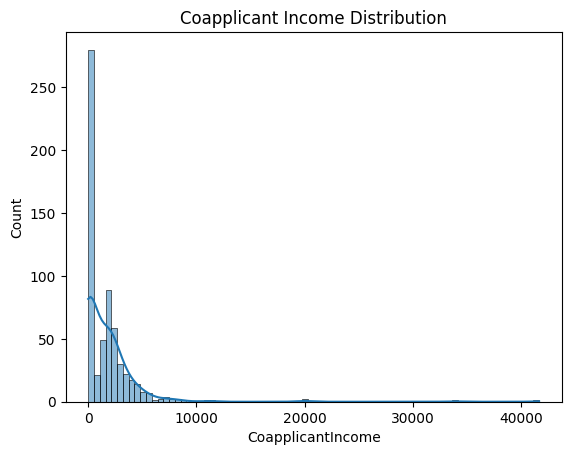

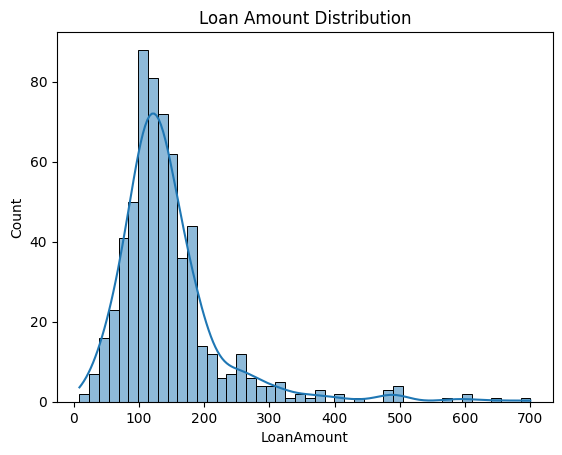

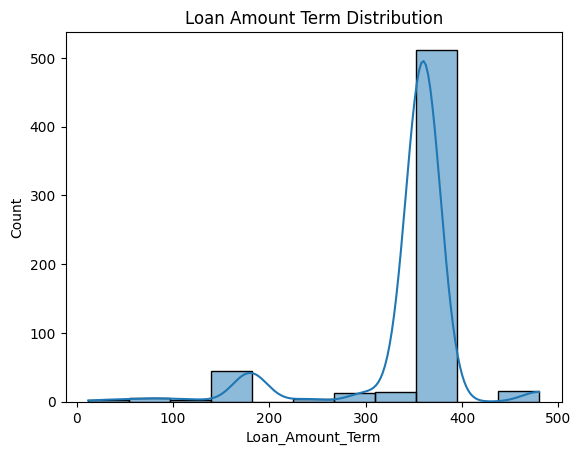

In [6]:
# Numerical attributes visualization
sns.histplot(df['ApplicantIncome'], kde=True).set_title('Applicant Income Distribution')
plt.show()
sns.histplot(df['CoapplicantIncome'], kde=True).set_title('Coapplicant Income Distribution')
plt.show()
sns.histplot(df['LoanAmount'], kde=True).set_title('Loan Amount Distribution')
plt.show()
sns.histplot(df['Loan_Amount_Term'], kde=True).set_title('Loan Amount Term Distribution')
plt.show()

In [7]:
# Creation of new attributes
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'] + 1)
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome'] + 1)
df['LoanAmountLog'] = np.log(df['LoanAmount'] + 1)
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term'] + 1)
df['Total_Income_Log'] = np.log(df['Total_Income'] + 1)

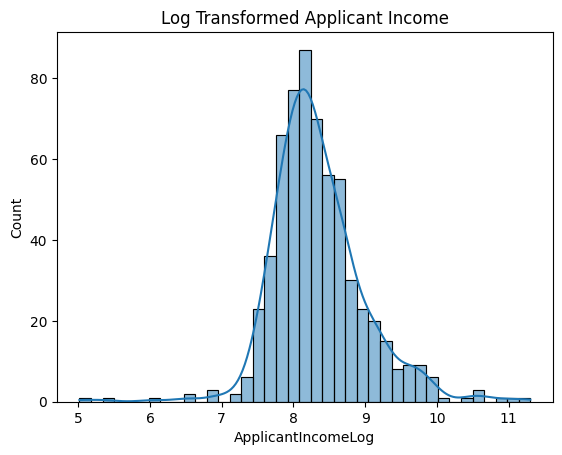

In [8]:
# Visualizing Log Transformations
sns.histplot(df['ApplicantIncomeLog'], kde=True).set_title('Log Transformed Applicant Income')
plt.show()

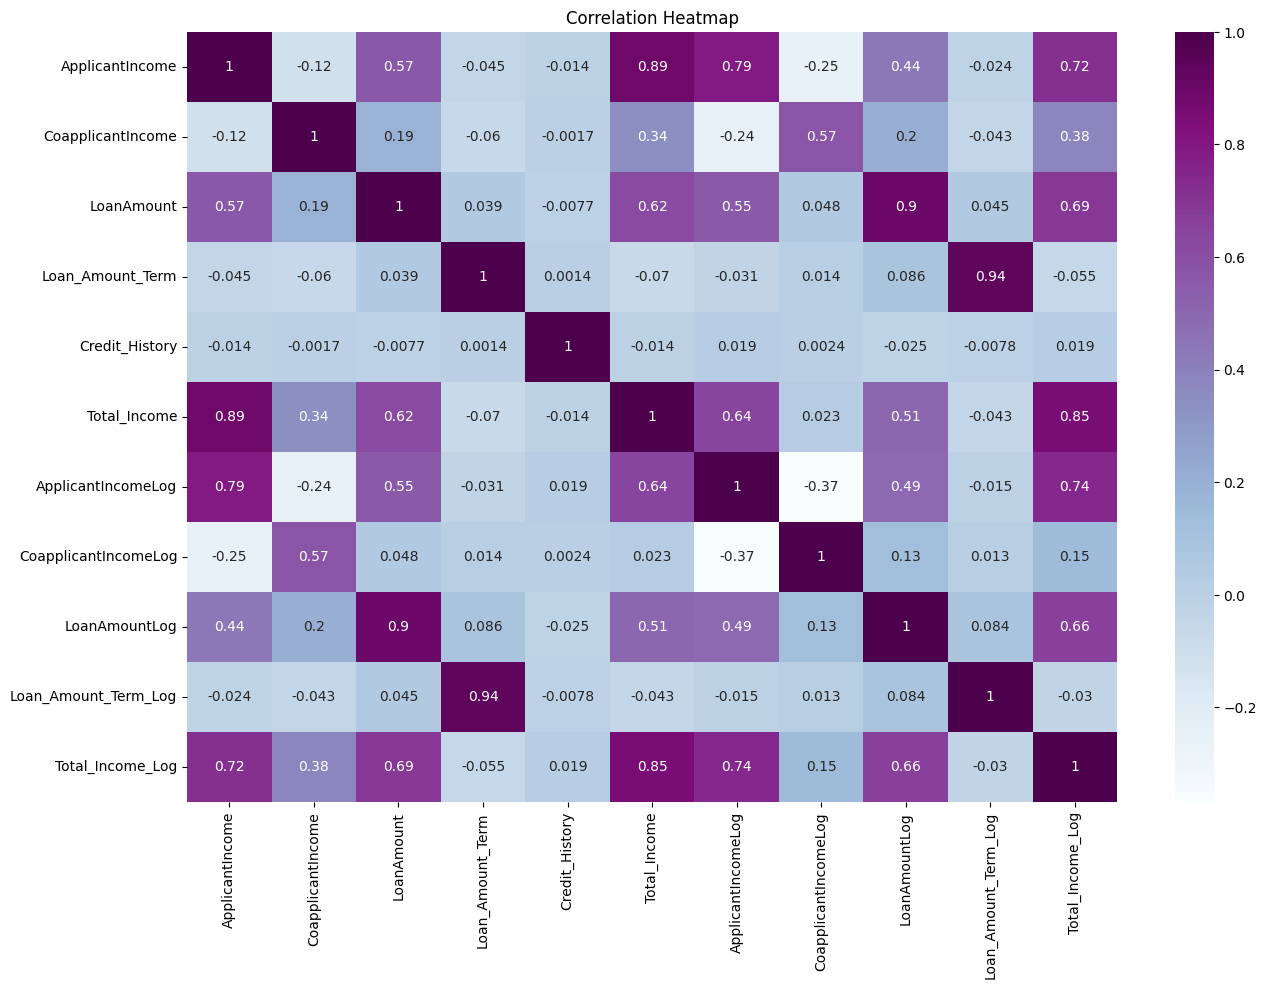

In [9]:
# Correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap="BuPu")
plt.title('Correlation Heatmap')
plt.show()

In [10]:
# Drop unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'Loan_ID', 'CoapplicantIncomeLog']
df = df.drop(columns=cols, axis=1)

In [11]:
# Label Encoding
cols = ['Gender', "Married", "Education", 'Self_Employed', 'Credit_History', "Property_Area", "Loan_Status", "Dependents"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [12]:
print(df.head())
print(df.info())

   Gender  Married  Dependents  Education  Self_Employed  Credit_History  \
0       1        0           0          0              0               2   
1       1        1           1          0              0               2   
2       1        1           0          0              1               2   
3       1        1           0          1              0               2   
4       1        0           0          0              0               2   

   Property_Area  Loan_Status  ApplicantIncomeLog  LoanAmountLog  \
0              2            1            8.674197       4.993232   
1              0            0            8.430327       4.859812   
2              2            1            8.006701       4.204693   
3              2            1            7.857094       4.795791   
4              2            1            8.699681       4.955827   

   Loan_Amount_Term_Log  Total_Income_Log  
0              5.888878          8.674197  
1              5.888878          8.714732  
2 

In [13]:
# Specify input and output attributes
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [20]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Model Training and Evaluation
def classify(model, x_train, y_train, x_test, y_test):
    # Fit the model
    model.fit(x_train, y_train)
    
    # Predictions
    y_pred = model.predict(x_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    # Print metrics
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")
    print(f"F1 Score: {f1 * 100:.2f}%")
    print("Confusion Matrix:")
    print(cm)
    print("\n")

In [22]:
# Logistic Regression
log_model = LogisticRegression(max_iter=200)
classify(log_model, x_train, y_train, x_test, y_test)

Model: LogisticRegression
Accuracy: 77.92%
Precision: 76.19%
Recall: 96.00%
F1 Score: 84.96%
Confusion Matrix:
[[24 30]
 [ 4 96]]




In [23]:
# Decision Tree Classifier
tree_model = DecisionTreeClassifier()
classify(tree_model, x_train, y_train, x_test, y_test)

Model: DecisionTreeClassifier
Accuracy: 72.08%
Precision: 77.14%
Recall: 81.00%
F1 Score: 79.02%
Confusion Matrix:
[[30 24]
 [19 81]]




In [24]:
# Random Forest Classifier
rf_model = RandomForestClassifier()
classify(rf_model, x_train, y_train, x_test, y_test)

Model: RandomForestClassifier
Accuracy: 79.22%
Precision: 76.98%
Recall: 97.00%
F1 Score: 85.84%
Confusion Matrix:
[[25 29]
 [ 3 97]]


